# Quick Start Example

In [1]:
using IRKGaussLegendre
using OrdinaryDiffEq
using LinearAlgebra
using Plots

In [11]:
# Hamiltonian vector field for the 2D harmonic oscillator:
#   dq/dt =  p
#   dp/dt = -q
function harmonic!(du, u, p, t)
    q1, q2, p1, p2 = u
    du[1] = p1
    du[2] = p2
    du[3] = -q1
    du[4] = -q2
end

# Initial condition: slightly elliptical orbit
u0 = [1.0, 0.0, 0.0, 1.0]
tspan = (0.0, 100.0)

prob = ODEProblem(harmonic!, u0, tspan)

# Solve using IRKGL16 (default 8-stage, 16th-order)
sol = solve(prob, IRKGL16(second_order_ode=true); dt = 1.0, adaptive = false)
sol.destats

SciMLBase.DEStats
Number of function 1 evaluations:                  0
Number of function 2 evaluations:                  5720
Number of W matrix evaluations:                    0
Number of linear solves:                           0
Number of Jacobians created:                       0
Number of nonlinear solver iterations:             0
Number of nonlinear solver convergence failures:   0
Number of fixed-point solver iterations:           715
Number of fixed-point solver convergence failures: 0
Number of rootfind condition calls:                0
Number of accepted steps:                          100
Number of rejected steps:                          0

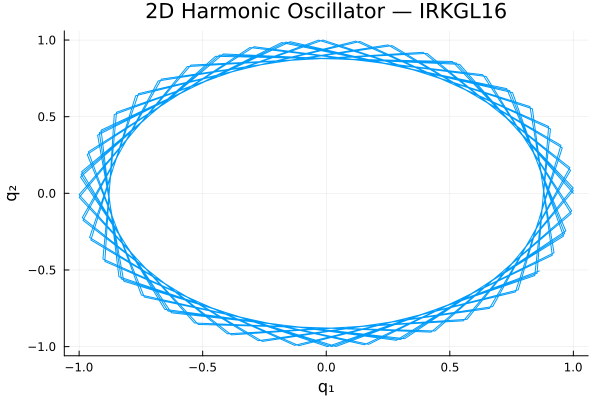

In [12]:
q1=[u[1] for u in sol.u]
q2=[u[2] for u in sol.u]
plot(q1,q2, xlabel="q₁", ylabel="q₂", label="",
     title="2D Harmonic Oscillator — IRKGL16")

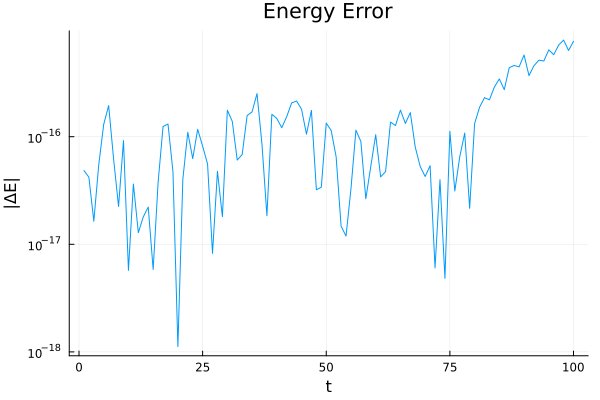

In [13]:
H(u) = (u[1]^2 + u[2]^2 + u[3]^2 + u[4]^2)/2

E0 = H(BigFloat.(u0))
E = H.(sol.u)

ΔE=abs.(map(x->H(BigFloat.(x)),sol.u)./E0.-1)

plot(sol.t[2:end], ΔE[2:end],
     yscale=:log10,
     xlabel="t", ylabel="|ΔE|", label=false,
     title="Energy Error")
